# <h1> Data Analyst Nanodegree Program - Project 5</h1>

# Ford GoBike System Data

### DOCUMENT CONTENT
- [Introduction](#intro)

- [Data Wrangling](#datawrangling)

    1. [GATHER](#gather)
    
    2. [ASSESS](#assess)
    
    3. [CLEAN](#clean)

- [Data Analysis](#dataanalysis)

    1. [Univariate Exploration](#univariate)
    
    2. [Bivariate Exploration](#bivariate)
    
    3. [Multivariate Exploration](#multivariate)

- [Summary](#summary)





<a id='intro'></a>
## INTRODUCTION

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

<a id='datawrangling'></a>
## DATA WRANGLING

<a id='gather'></a>
### 1. GATHER

In [1]:
#import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


<a id='assess'></a>
### 2. ASSESS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


DATA TYPE ASSESSMENT

* start_time,end_time should be date

* start_station_id, end_station_id should be int

* member_birth_year should be int

* bike_id should be int

In [4]:
print(df.shape)

(183412, 16)


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


* Minimum birth year is 1878. It is not possible.

In [6]:
#start year is 2019. How old can the riders be?
df.start_time.min()

'2019-02-01 00:00:20.6360'

In [7]:
#there are 203 rows where member birth date is less than 1940, older than 79
# I am not sure that these are reliable datas.
df[df['member_birth_year']<1940]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.6270,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes
5197,217,2019-02-28 13:51:46.2380,2019-02-28 13:55:24.1270,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931.0,Male,No
5266,384,2019-02-28 13:35:05.4280,2019-02-28 13:41:30.2230,84.0,Duboce Park,37.769201,-122.433812,71.0,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931.0,Male,No
5447,147,2019-02-28 13:08:56.9350,2019-02-28 13:11:24.0620,84.0,Duboce Park,37.769201,-122.433812,72.0,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931.0,Male,No
10827,1315,2019-02-27 19:21:34.4360,2019-02-27 19:43:30.0080,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No
16087,1131,2019-02-27 08:37:36.8640,2019-02-27 08:56:28.0220,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No
17981,366,2019-02-26 19:53:38.5280,2019-02-26 19:59:44.9680,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5226,Subscriber,1920.0,Male,No
18885,432,2019-02-26 17:48:59.0160,2019-02-26 17:56:11.3700,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,37.780526,-122.390288,5319,Subscriber,1920.0,Male,No
19375,641,2019-02-26 17:03:19.8550,2019-02-26 17:14:01.6190,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900.0,Male,No
20743,380,2019-02-26 10:57:07.7670,2019-02-26 11:03:28.1960,26.0,1st St at Folsom St,37.787290,-122.394380,61.0,Howard St at 8th St,37.776513,-122.411306,5387,Subscriber,1933.0,Female,Yes


In [8]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

MISSING DATA ASSESSMENT

* 197 data missing for start_station_id,start_station name,end_station_id,end_station name

* 8265 data missing for member_birth_day and member_gender

In [9]:
# Missing value rows are same for start&end station id and name.
df[(df['start_station_id'].isnull()) & (df['start_station_name'].isnull()) & (df['end_station_id'].isnull()) & (df['end_station_name'].isnull())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No


In [10]:
# Missing member birth date and gender at same row
df[(df['member_birth_year'].isnull()) & (df['member_gender'].isnull())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
147,372,2019-02-28 22:46:19.1140,2019-02-28 22:52:31.4770,369.0,Hyde St at Post St,37.787349,-122.416651,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2191,Customer,NaN,NaN,No
176,730,2019-02-28 22:28:50.5140,2019-02-28 22:41:00.8970,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,258.0,University Ave at Oxford St,37.872355,-122.266447,4784,Customer,NaN,NaN,No
220,1425,2019-02-28 22:05:25.5530,2019-02-28 22:29:11.1180,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,109.0,17th St at Valencia St,37.763316,-122.421904,6525,Subscriber,NaN,NaN,No
266,1302,2019-02-28 21:53:13.2740,2019-02-28 22:14:56.1730,181.0,Grand Ave at Webster St,37.811377,-122.265192,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2471,Customer,NaN,NaN,No
292,1468,2019-02-28 21:43:04.3630,2019-02-28 22:07:32.6640,321.0,5th St at Folsom,37.780146,-122.403071,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,6040,Customer,NaN,NaN,No


In [11]:
# There are 2 categories for user type
# user_type should be category
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
# There are 3 categories. 
# I will accept these 3652 datas as those who do not want to specify their gender.
# member_gender should be category

df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [13]:
# bike_share_for_all_trip should be category
df['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [14]:
df.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
6421,804,2019-02-28 10:10:48.8230,2019-02-28 10:24:12.9810,19.0,Post St at Kearny St,37.788975,-122.403452,74.0,Laguna St at Hayes St,37.776435,-122.426244,5816,Subscriber,1999.0,Male,No
138552,192,2019-02-08 07:19:37.6830,2019-02-08 07:22:50.1610,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,245.0,Downtown Berkeley BART,37.870139,-122.268422,5053,Subscriber,1968.0,Male,No
149922,136,2019-02-06 18:45:34.7910,2019-02-06 18:47:51.2710,89.0,Division St at Potrero Ave,37.769218,-122.407646,90.0,Townsend St at 7th St,37.771058,-122.402717,2955,Subscriber,1988.0,Male,No
1408,480,2019-02-28 19:11:36.2740,2019-02-28 19:19:36.5150,223.0,16th St Mission BART Station 2,37.764765,-122.420091,147.0,29th St at Tiffany Ave,37.744067,-122.421472,4825,Subscriber,1988.0,Male,No
106253,1216,2019-02-13 18:19:47.6720,2019-02-13 18:40:04.0100,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,112.0,Harrison St at 17th St,37.763847,-122.413004,4420,Subscriber,1989.0,Female,No
92981,970,2019-02-15 18:00:50.7890,2019-02-15 18:17:00.8030,130.0,22nd St Caltrain Station,37.757288,-122.392051,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,6323,Subscriber,1983.0,Male,No
30233,673,2019-02-24 21:10:41.8970,2019-02-24 21:21:55.2370,279.0,Santa Clara St at 7th St,37.339146,-121.884105,296.0,5th St at Virginia St,37.325998,-121.877120,4225,Subscriber,1994.0,Female,Yes
149584,488,2019-02-06 19:05:58.1240,2019-02-06 19:14:06.3560,73.0,Pierce St at Haight St,37.771793,-122.433708,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5424,Subscriber,1988.0,Male,No
26789,797,2019-02-25 11:08:10.0850,2019-02-25 11:21:27.8480,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,3402,Subscriber,1981.0,Female,No
30167,308,2019-02-24 21:41:43.5120,2019-02-24 21:46:52.3550,66.0,3rd St at Townsend St,37.778742,-122.392741,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5060,Subscriber,1995.0,Male,No


### Quality Summary

* start_time,end_time should be date

* start_station_id, end_station_id should be int

* member_birth_year should be int

* bike_id should be int

* member_gender should be category

* user_type should be category

* bike_share_for_all_trip should be category

* there are 203 rows where member birth date is less than 1945

* 197 missing value for start_station_id, start_station_name, end_station_id, end_station_name

* 8265 missing value for member_birth_date and member_gender

### TIDINESS

* Create month,day,time columns

<a id='clean'></a>
### 3. CLEAN

Quality issues are defined above. I will focus to clean these issues at this section

In [15]:
# copy of dataframe will be used
df_clean=df.copy()

In [16]:
#Fixing columns that have wrong data types
df_clean['start_time'] = df_clean['start_time'].astype('datetime64[ns]')
df_clean['end_time'] = df_clean['end_time'].astype('datetime64[ns]')
df_clean['bike_id'] = df_clean['bike_id'].astype(int)
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
dtypes: category(2), datetime64[ns](2), float64(7), int64(2), ob

In [18]:
#drop rows where member_birth_date column has missing value
df_clean = df_clean[pd.notnull(df_clean['member_birth_year'])]

In [19]:
#control if member_birth_year has missing value
df_clean['member_birth_year'].isnull().sum()

0

In [20]:
#control if member_gender has missing value
df_clean['member_gender'].isnull().sum()

0

In [21]:
#change member_birth_year data type to int
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)


In [22]:
#control if data is still float
df_clean['member_birth_year'].sample(5)

42229     1989
152766    1979
90234     1991
157808    1987
26056     1995
Name: member_birth_year, dtype: int64

I will investigate missing start_station_id/name and end_station_id/name values.
Before directly drop these rows, I want to be sure that if same latitude&longitude is entered

In [23]:
#missing start_station_id rows are listed below
df_clean[df_clean['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991,Female,No
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980,Male,No
3625,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988,Male,No
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984,Male,Yes
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984,Male,Yes
6214,1334,2019-02-28 10:32:47.930,2019-02-28 10:55:02.028,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990,Male,No
8499,240,2019-02-28 08:23:07.092,2019-02-28 08:27:07.289,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988,Male,No
8783,883,2019-02-28 07:58:07.372,2019-02-28 08:12:51.276,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980,Male,No
10967,116,2019-02-27 19:25:57.036,2019-02-27 19:27:54.026,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988,Male,No
11071,828,2019-02-27 19:03:14.638,2019-02-27 19:17:03.434,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980,Male,No


In [24]:
df_clean[(df_clean.start_station_latitude==37.40) & (df_clean.start_station_longitude==-121.94) ]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991,Female,No
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.4,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980,Male,No
11071,828,2019-02-27 19:03:14.638,2019-02-27 19:17:03.434,NaN,NaN,37.4,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980,Male,No
17908,393,2019-02-26 20:11:35.080,2019-02-26 20:18:08.670,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.93,4250,Subscriber,1990,Male,No
18639,954,2019-02-26 18:02:37.229,2019-02-26 18:18:32.065,NaN,NaN,37.4,-121.94,NaN,NaN,37.41,-121.96,4239,Subscriber,1980,Male,No
24539,997,2019-02-25 17:57:40.533,2019-02-25 18:14:18.330,NaN,NaN,37.4,-121.94,NaN,NaN,37.41,-121.96,4239,Subscriber,1980,Male,No
46229,411,2019-02-22 10:05:15.468,2019-02-22 10:12:07.129,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.95,4162,Subscriber,1990,Female,Yes
69399,2020,2019-02-19 19:10:11.072,2019-02-19 19:43:51.285,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.94,4197,Customer,1982,Male,No
71419,1071,2019-02-19 17:20:07.786,2019-02-19 17:37:58.987,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.93,4250,Customer,1990,Female,No
79544,1558,2019-02-18 17:05:49.888,2019-02-18 17:31:48.525,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.94,4245,Customer,1962,Male,No


Interesting! 22 missing value where start_station_latitude is 37.4 and start_station_longitude is -121.94. end_station_latitude and longitude is almost similar for all!

In [25]:
missing_coordinates=df_clean[df_clean['start_station_id'].isnull()]
missing_coordinates.start_station_latitude.value_counts()

37.41    99
37.40    63
37.42    21
37.39    11
37.38     1
Name: start_station_latitude, dtype: int64

In [26]:
missing_coordinates.start_station_longitude.value_counts()

-121.94    56
-121.93    46
-121.96    45
-121.95    37
-121.92    10
-121.98     1
Name: start_station_longitude, dtype: int64

In [27]:
missing_coordinates.end_station_latitude.value_counts()

37.41    96
37.40    65
37.42    18
37.39    13
37.38     2
37.43     1
Name: end_station_latitude, dtype: int64

In [28]:
missing_coordinates.end_station_longitude.value_counts()

-121.94    54
-121.93    50
-121.96    46
-121.95    32
-121.92    11
-121.98     2
Name: end_station_longitude, dtype: int64

Interesting! Start points and end points are quite close to each other!

[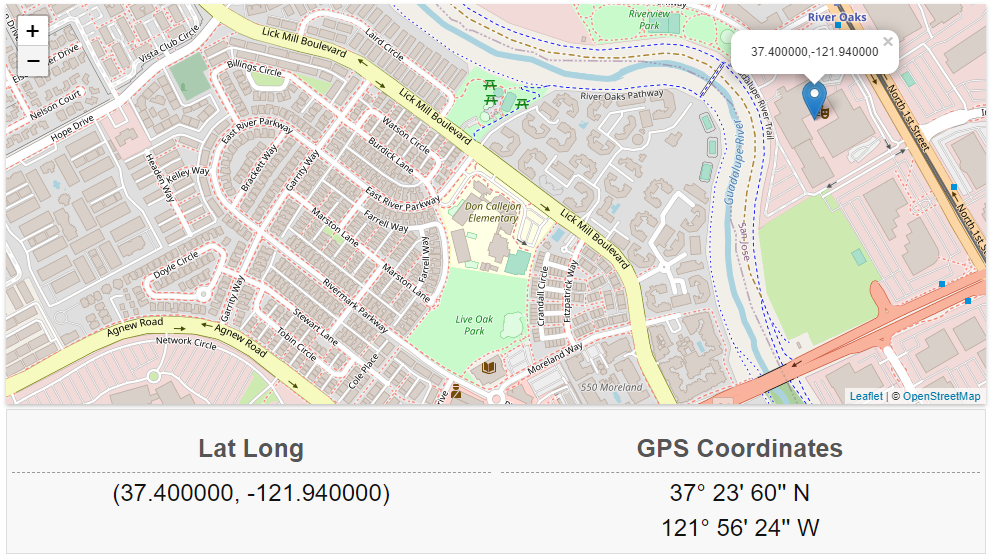](http://)

[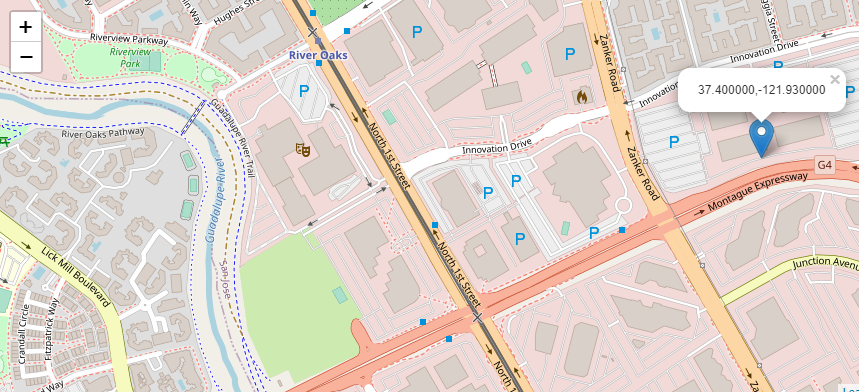](http://)

These locations are not on streets, usually on private areas or even a lake! 
So I decided to drop missing values.

In [29]:
#drop rows where start_station_name column has missing value
df_clean = df_clean[pd.notnull(df_clean['start_station_name'])]

In [30]:
#control if there is missing value
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
dtypes: category(2), datetime64[ns](2), float64(6), int64(3), obje

In [31]:
#fix data types
df_clean['start_station_id'] = df_clean['start_station_id'].astype(int)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(int)

In [32]:
#I have decided to drops below columns where member birth date is less than 1945
df_clean[df_clean['member_birth_year']<1945]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes
2085,694,2019-02-28 18:21:05.187,2019-02-28 18:32:39.596,107,17th St at Dolores St,37.763015,-122.426497,89,Division St at Potrero Ave,37.769218,-122.407646,385,Subscriber,1941,Male,No
5197,217,2019-02-28 13:51:46.238,2019-02-28 13:55:24.127,70,Central Ave at Fell St,37.773311,-122.444293,71,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931,Male,No
5249,1396,2019-02-28 13:21:36.678,2019-02-28 13:44:53.057,22,Howard St at Beale St,37.789756,-122.394643,74,Laguna St at Hayes St,37.776435,-122.426244,623,Subscriber,1943,Female,No
5266,384,2019-02-28 13:35:05.428,2019-02-28 13:41:30.223,84,Duboce Park,37.769201,-122.433812,71,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931,Male,No
5447,147,2019-02-28 13:08:56.935,2019-02-28 13:11:24.062,84,Duboce Park,37.769201,-122.433812,72,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931,Male,No
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343,Bryant St at 2nd St,37.783172,-122.393572,375,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900,Male,No
13675,554,2019-02-27 15:09:41.550,2019-02-27 15:18:55.971,27,Beale St at Harrison St,37.788059,-122.391865,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5855,Subscriber,1942,Male,No
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375,Grove St at Masonic Ave,37.774836,-122.446546,36,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900,Male,No
17981,366,2019-02-26 19:53:38.528,2019-02-26 19:59:44.968,50,2nd St at Townsend St,37.780526,-122.390288,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5226,Subscriber,1920,Male,No


In [33]:
df_clean.drop(df_clean.loc[df_clean['member_birth_year']<=1945].index, inplace=True)

In [34]:
#control if there birth year less than 1945
df_clean.query('member_birth_year <1945')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [35]:
#create date, day,time column
df_clean['trip_month'] = df_clean.start_time.dt.strftime('%b')
df_clean['trip_day'] = df_clean.start_time.dt.strftime('%a')
df_clean['trip_hour'] = df_clean.start_time.dt.strftime('%H')

In [36]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Feb,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Feb,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Feb,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Feb,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Feb,Thu,23


In [37]:
#fix trip hour data type
df_clean['trip_hour']= df_clean['trip_hour'].astype(int)



In [38]:
# create new column as period
df_clean['period'] = (df_clean['trip_hour']% 24 + 4) // 4
df_clean['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [39]:
#create age column
df_clean['age']=2020-df_clean['member_birth_year']

<a id='dataanalysis'></a>
## DATA ANALYSIS

<a id='univariate'></a>
### 1. UNIVARIATE EXPLORATION

In [40]:
base_color = sb.color_palette()[0]

In [41]:
freq = df_clean['member_gender'].value_counts()

# Get the indexes of the Series
gen_order = freq.index


##  Participants Gender Distribution

3619 participants did not state their gender yet graphic shows clearly that male gender participated more than females. 
%74.6 of participants are male.

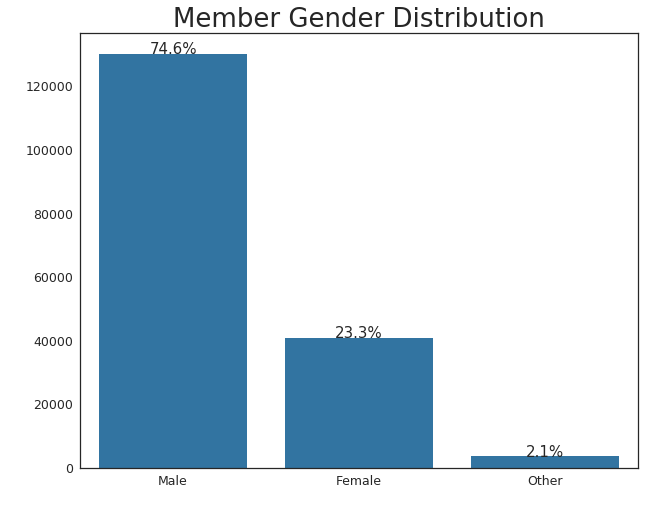

In [42]:
sb.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(10.0, 8.0),
            'xtick.labelsize':25,}) 
sb.set(style="white",font_scale=1.25)

ax=sb.countplot(x ='member_gender', data = df_clean, color=base_color,order=gen_order)
plt.title('Member Gender Distribution', fontsize=26)
plt.xlabel(" ")
plt.ylabel(" ")

bars = ax.patches

total=bars[0].get_height()+bars[1].get_height()+bars[2].get_height()

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()+0.6
    ax.annotate(percentage, (x-0.4, y),ha='center')

plt.show()


##  User Types Distribution

%90.5 participants defined as subscriber, %9.5 participants are costumer.

In [71]:
#Distribution of type of users
data = df_clean['user_type'].value_counts()/df_clean['user_type'].value_counts().sum()

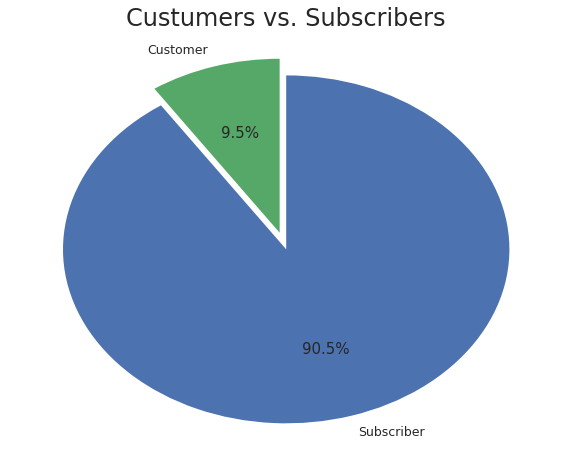

In [87]:
explode = (0, 0.1)
plt.title('Custumers vs. Subscribers',fontsize=24)
plt.pie(data, labels = data.index, startangle = 90, counterclock = False,explode=explode,autopct='%1.1f%%');


##  Bike Share Distribution

%90.1 participants said "No". Most of participants did not share their bikes.

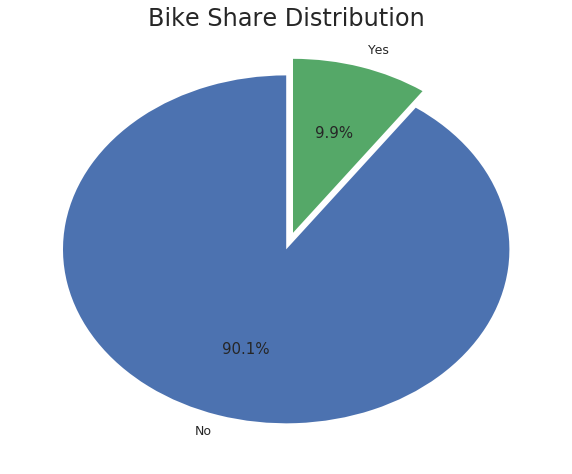

In [44]:
#Distribution of type of users
data = df_clean['bike_share_for_all_trip'].value_counts()/df_clean['bike_share_for_all_trip'].value_counts().sum()
explode = (0, 0.1)  
plt.pie(data, labels = data.index, autopct='%1.1f%%' , startangle = 90, explode=explode)
plt.title('Bike Share Distribution', fontsize=24);
plt.figure(figsize=(1,1))


In [45]:
df_clean['member_birth_year'].describe()

count    174582.000000
mean       1984.916733
std           9.794782
min        1946.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

##  Member Birth Year Distribution

Graphic shows that most of participants were born between 1985 and 1995.
Only few people joined who were born at 1945s.

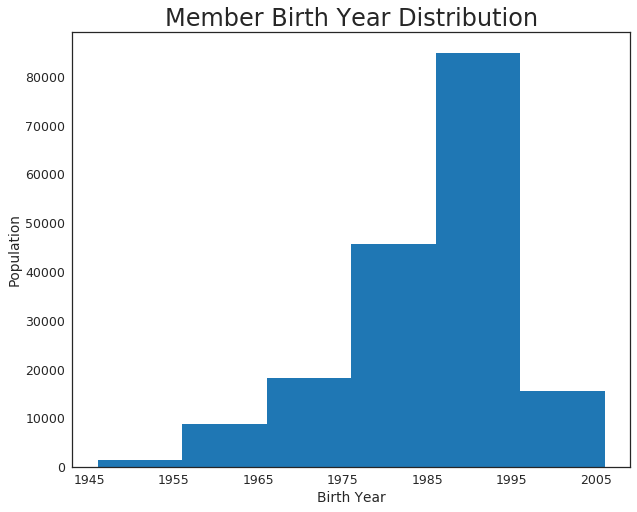

In [46]:
bins = np.arange(1946, df_clean['member_birth_year'].max()+10, 10)

plt.hist(data = df_clean, x = 'member_birth_year', bins = bins, color=base_color)
plt.xlabel('Birth Year')
plt.ylabel('Population')
plt.title('Member Birth Year Distribution', fontsize=24)
 
plt.xticks(np.arange(1945, 2010, 10))

plt.show()

In [47]:
df_clean['duration_sec'].describe()


count    174582.000000
mean        704.297018
std        1643.699032
min          61.000000
25%         323.000000
50%         511.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

## DURATION OF TRIP DISTRIBUTION

Graphic is right-skewed.
The vast majority of people traveled between 200 and 500 seconds. 
Longer duration of trip than 500 seconds is decreasing smoothly.

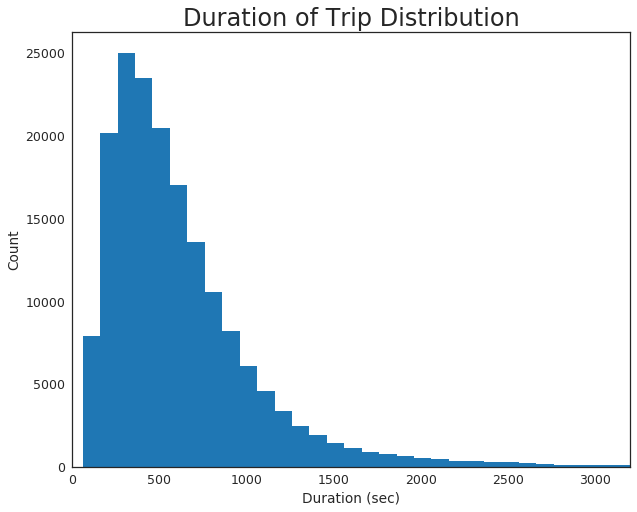

In [48]:
bins = np.arange(61, df_clean['duration_sec'].max()+10, 100)

plt.hist(data = df_clean, x = 'duration_sec', bins = bins, color=base_color)
plt.xlim((0,3200));
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration of Trip Distribution', fontsize=24)
plt.show()

## Age Distribution

Most of the participants are younger than 40 years old. 
People who are 30-35 years old have highest percentage.

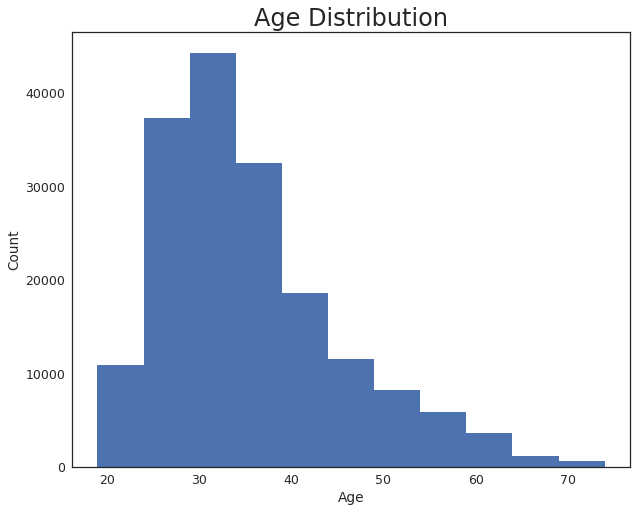

In [100]:
bins = np.arange(19, df_clean['age'].max()+1, 5)

plt.hist(data=df_clean, x='age',bins=bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution', fontsize=24)
plt.show()

<a id='bivariate'></a>
### 1. BIVARIATE EXPLORATION

## Age Group vs Duration of Trip

Graphic shows that 60-75 age group has higher duration of trip than other age groups. Duration trip is approximately same for other age groups

In [49]:
majority=df_clean[df_clean['duration_sec']<2000]
majority.loc[(majority.age < 30),  'AgeGroup'] = '19-29'
majority.loc[((majority.age >= 30) & (majority.age < 40)),  'AgeGroup'] = '30-39'
majority.loc[((majority.age >= 40) & (majority.age < 50)),  'AgeGroup'] = '40-49'
majority.loc[((majority.age >= 50) & (majority.age < 60)),  'AgeGroup'] = '50-59'
majority.loc[((majority.age >= 60) ),  'AgeGroup'] = '60-75'



/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5,1,'Age Group vs Duration of Trip')

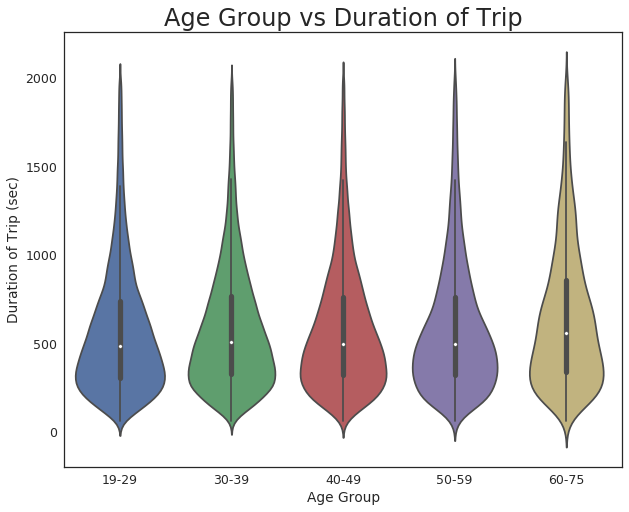

In [50]:

sb.violinplot(data=majority, x='AgeGroup', y='duration_sec', order=['19-29','30-39','40-49','50-59','60-75']);
plt.xlabel('Age Group')
plt.ylabel('Duration of Trip (sec)')
plt.title('Age Group vs Duration of Trip',fontsize=24)

## Member Gender Distribution Regarding to User Type 

Graphic shows that over than 2.000 female are subscriber it is incredibly more for male gender. Approximately 120.000 male members are subscriber.
Subcribers are more than customers for male, female and other genders.


Text(0,0.5,'Count')

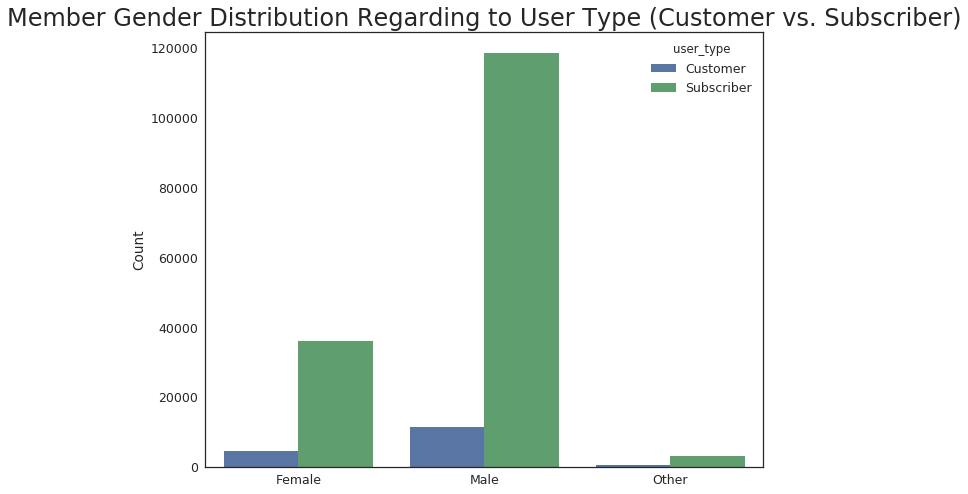

In [51]:
ax=sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type')
plt.title('Member Gender Distribution Regarding to User Type (Customer vs. Subscriber)', fontsize=24)
plt.xlabel('')
plt.ylabel('Count')



## Member Gender vs Duration of Trip(sec)

Graphic shows that duration of trip distribution regarding to genders. 
Duration of trip is quite less for man gender but it is quite similar for female and others gender

Text(0.5,1,'Member Gender vs Duration of Trip(sec)')

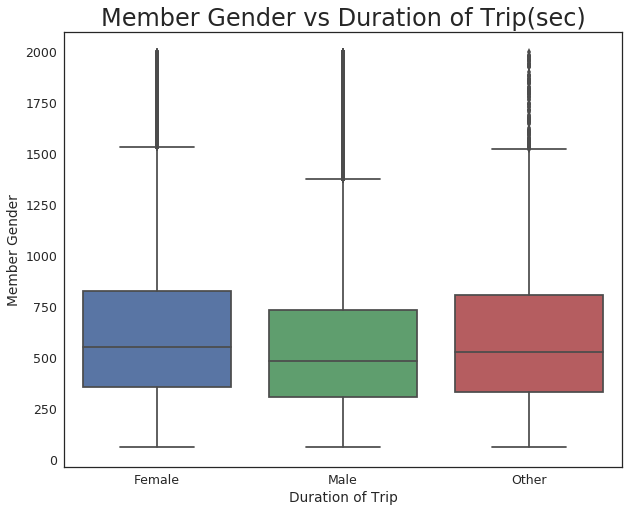

In [52]:

sb.boxplot(x="member_gender", y="duration_sec", data=majority)
plt.xlabel('Duration of Trip')
plt.ylabel('Member Gender');
plt.title('Member Gender vs Duration of Trip(sec)',fontsize=24)

## Duration of Trip vs User Type

Graphic shows that customers have more duration of trip than subscribers. Interesting! Is it because it was their first experience and they wanted to try more?

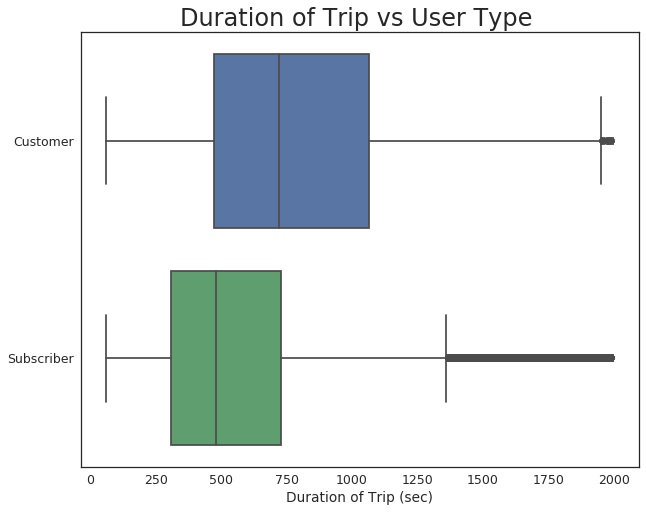

In [53]:
majority = df_clean[df_clean['duration_sec'] < 2000]

sb.boxplot(data =majority , y='user_type', x='duration_sec')
plt.title('Duration of Trip vs User Type ',fontsize=24)
plt.xlabel('Duration of Trip (sec)')
plt.ylabel('');

## Duration Of Trip Per Day

Duration of trip in seconds is higher on Saturday and Sunday.
Monday is most popular day in week days.


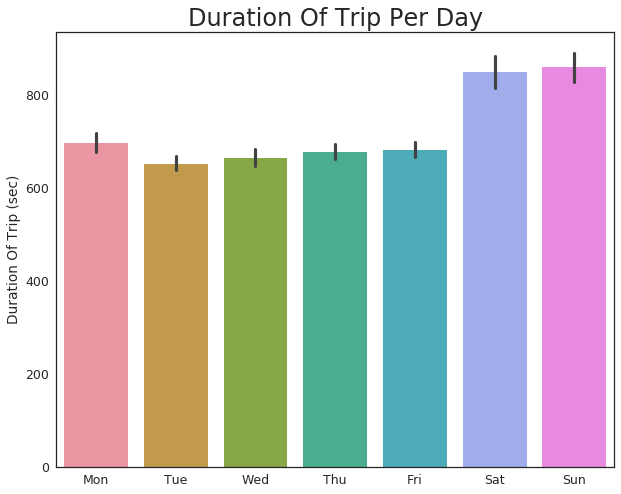

In [54]:
order=['Mon', 'Tue','Wed','Thu','Fri','Sat','Sun']

ax=sb.barplot(data = df_clean , x = 'trip_day' , y='duration_sec', order=order)
plt.title('Duration Of Trip Per Day', fontsize=24)
plt.xlabel('')
plt.ylabel('Duration Of Trip (sec)');


## Duration of Trip Per Day Period

Graphic shows that people prefered to ride more at evening and morning.

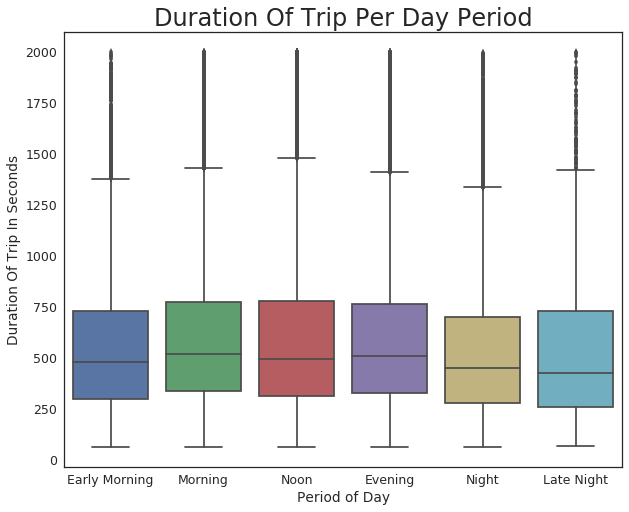

In [55]:
sb.boxplot(data=majority, x='period', y='duration_sec', order=['Early Morning', 'Morning','Noon','Evening','Night','Late Night']);
plt.title('Duration Of Trip Per Day Period', fontsize=24)
plt.xlabel('Period of Day')
plt.ylabel('Duration Of Trip In Seconds');


## Member Gender Distribution Regarding to Day Period

Both female and male members prefered to ride at evening and morning more than other period of day. It is interesting that female gender prefered late night quite less than male.

Text(0,0.5,'')

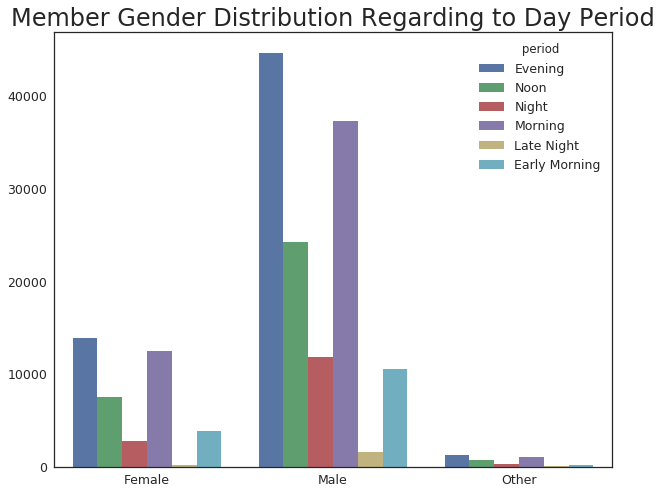

In [56]:
sb.countplot(data = df_clean, x = 'member_gender', hue = 'period')
plt.title('Member Gender Distribution Regarding to Day Period', fontsize=24)
plt.xlabel('')
plt.ylabel('')

In [57]:
freq_station = df_clean.start_station_name.value_counts()
y = freq_station.values[0:20] 
x = freq_station.index[0:20]

In [58]:
majority_station=df_clean.loc[df_clean['start_station_name'].isin(x)]

## Most Popular Start Stations vs User Type


Customers Market St at 10th St is most popular start station for subcribers and costumers.

Top 10 popular start stations are used by subscribers more than costumers.

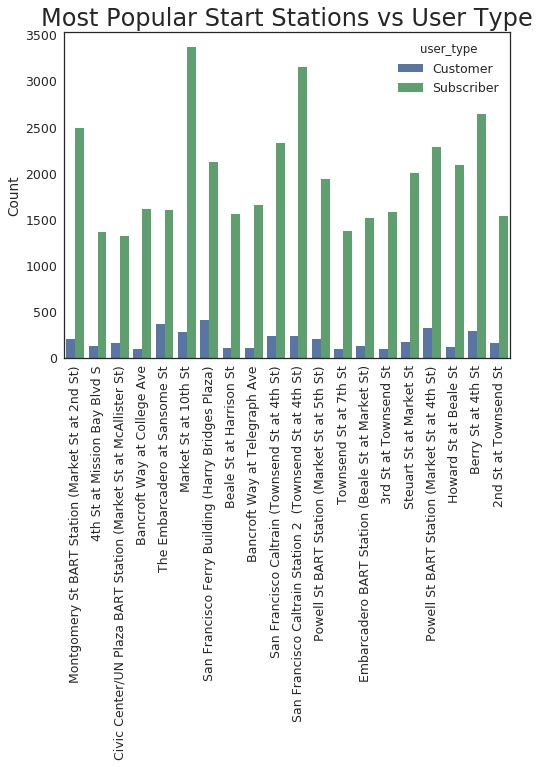

In [59]:
fig = plt.figure(figsize = [8,6])

sb.countplot(data = majority_station, x = 'start_station_name',hue = 'user_type')

plt.title('Most Popular Start Stations vs User Type', fontsize=24)
plt.ylabel('Count')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show();

<a id='multivariate'></a>
### 3. MULTIVARIATE EXPLORATION

## Mean Duration of Trip vs Days

Costumer has higher duration of trip than subcribers every day.
Subcribers has higher duration of trip on weekends.
Costumers has the lowest duration of trip on Tuesday yet their duration of trip is increasing on weekend as well.

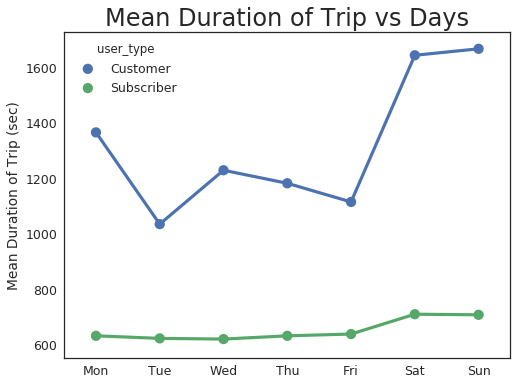

In [60]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'trip_day', y = 'duration_sec', hue = 'user_type',
             ci=None, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Mean Duration of Trip vs Days', fontsize=24)             
plt.ylabel('Mean Duration of Trip (sec)')
plt.xlabel('')
plt.show();

## Mean Duration of Trip vs Gender

Graphic shows that male gender always has higher mean duration of trip than women every day.
Both gender have highest mean duration of trip on Sunday.


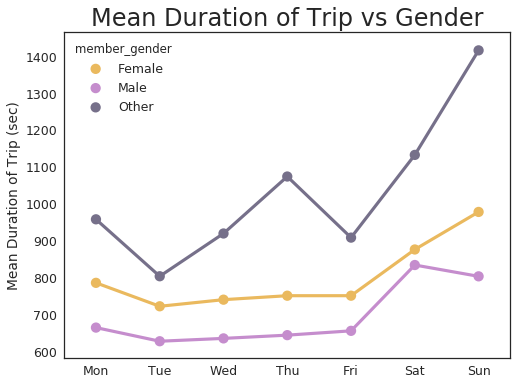

In [93]:
fig = plt.figure(figsize = [8,6])

sb.pointplot(data = df_clean, x = 'trip_day', y = 'duration_sec', hue = 'member_gender',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], palette=['#EAB95E', '#C58DCD', '#76708A'], ci=None)

plt.title('Mean Duration of Trip vs Gender', fontsize=24)
plt.ylabel('Mean Duration of Trip (sec)')
plt.xlabel('')
plt.show();

## Age vs Duration of Trip Regarding to Gender

Person who has highest duration of trip and is 19 years old is female.
Person who has more duration of trip than 8.000 second and is 39 years old is male.


In [62]:
majority_age = df_clean[df_clean['member_birth_year'] > 1980]


Text(42.3864,0.5,'Duration of Trip (sec)')

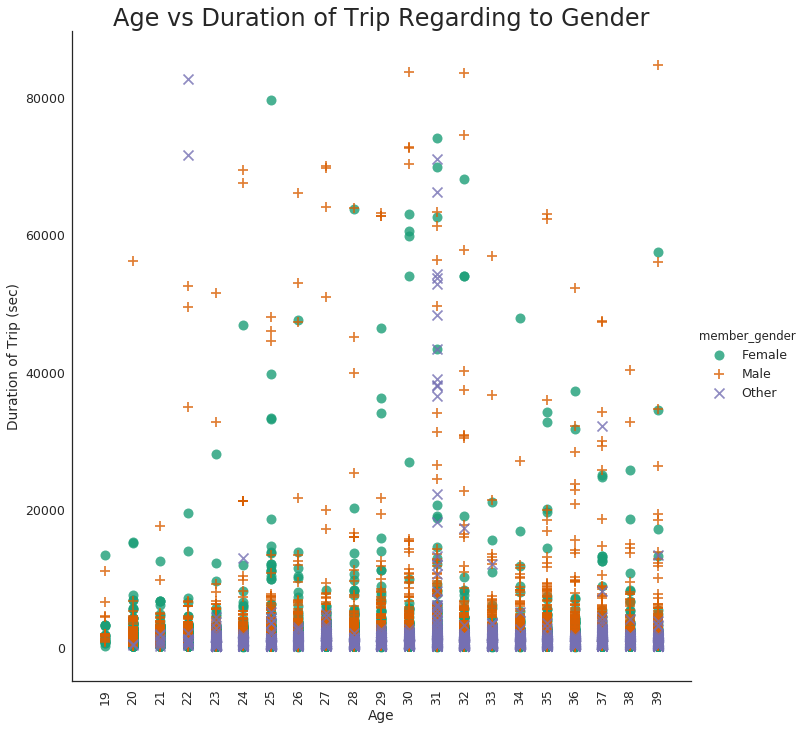

In [63]:
plt.gcf().set_size_inches(11.7, 8.27)

sb.lmplot(data = majority_age, x = 'age', y = 'duration_sec', hue = 'member_gender', palette = 'Dark2',
       fit_reg = False, scatter_kws={"s": 100}, size = 10, markers=["o","+","x"])
plt.title('Age vs Duration of Trip Regarding to Gender', fontsize=24)

plt.xticks(range(19,40,1))
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Duration of Trip (sec)')

## Start Station vs Duration of Trip Regarding to Gender

There is woman who had over than 8000 second duration of trip and her start station was Bancroft Way at College Ave. 

There are 4 women who had over than 2.000 second duration of trip and their start station was Berry St at 4th St.

There are 4 men who had over than 2.000 second duration of trip and their start station wasMontgomery St BART Station (Market St at 2nd St)

Text(42.3864,0.5,'Duration of Trip (sec)')

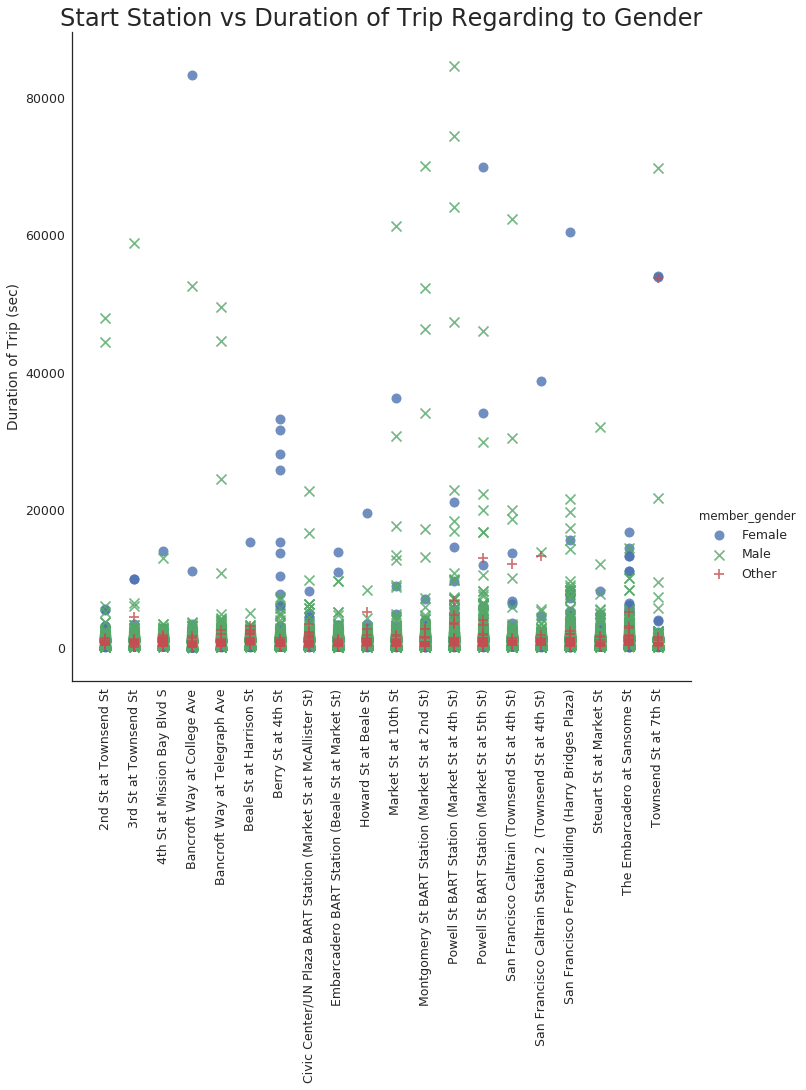

In [92]:
plt.gcf().set_size_inches(11.7, 8.27)

sb.lmplot(data = majority_station, x = 'start_station_name', y = 'duration_sec', hue = 'member_gender', 
       fit_reg = False, scatter_kws={"s": 100}, size = 10, markers=["o","x",'+'])
plt.title('Start Station vs Duration of Trip Regarding to Gender', fontsize=24)

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Duration of Trip (sec)')

In [65]:
#save df_clean
df_clean.to_csv('df_clean.csv', index=False)

<a id='summary'></a>
## SUMMARY

In this project, I gathered, assessed and cleaned data at wrangling phase and prepared for analysis.Later I started analysis data step by step. 

Quality issues were mostly incorrect data types and there were missing values for station name and member gender. I decided to delete rows of missing information. Also there was participants who were older than 75, I accepted this information wrong and deleted these rows as well. 
Also I created trip year, month, day, time, period of time, age columns.
Finally I started to analysis data.

Firtly I did univariate exploration. Here is my question to ask myself.

- Gender Distribution (bar chart): Male gender participated more than females. (%74.6 male)
- User Types Distribution (pie chart): %90.5 of participants is subscribers.
- Bike Share Distribution (pie chart): %90.1 of participants did not share their bike.
- Member Birth Year Distribution (histogram): Most of participants' birth year is between 1985 and 1995.
- Duration of Trip Distribution (histogram): Participants mostly used bikes between 200-500 seconds. 

Secondly I did bivariate exploration. Here is my question to ask myself.

- What is relationship between birth year vs duration of trip?: Participants who has birth year between 1985-1995 have higher duration of trip.
- What is relationship between gender distribution regarding to user type?: Females and males have higher participants who are subscribers.There are approx. 120.000 subscriber as male, approx. 4.000 subscribers 
- What is relationship between gender and duration trip?: Female has higher duration of trip than males.
- What is relationship between user type and duration trip?: Customer has higher duration of trip than subscribers.
- How is the distribution for duration of trip per day?: Weekends have higher duration of distribution than weekdays.
- How is the distribution for duration of trip per day period?: Duration of trip has higher value at evening and morning.
- What is relationship between gender and day period?: Both male and females used system on evening or morning more than other periods of day.
- What is relationship between gender and birth year?: Most of femaes and males were born at 1990-1980. 
- What is relationship between most popular stations and user type?: Customers Market St at 10th St is most popular start station for subcribers and costumers.

Finally I did multivariate exploration. Here is my question to ask myself.

- What is distribution duration of trip regarding to week days for subscribers and costumers?: Subscribers have less duration of trip than costumers for every day. Weekend is more popular than weekdays for both category.
- What is distribution duration of trip regarding to week days for males, females and others?: Others have higher duration of trip than males and females every day, females have higher duration of trip than males every day.
- What is distribution duration of trip regarding to genders for diffirent start stations?: There are 4 women who had over than 2.000 second duration of trip and their start station was Berry St at 4th St.
- What is the distribution duration of trip regarding to genders for diffirent ages?: Person who has highest duration of trip and is 19 years old is female.


As a result, some of my findings were really interesting and I added them to my explanatory analysis result as slide.
Here is some of them:

- It is obvious that male participants have important percentage than women.
- Although subscribers are more than customers, customers have higher duration of trip than subscribers. 
- People have more duration of trip at weekends.
- Mean Duration of trip is quite close for every period of day.
- Most Popular start station is Market St at 10th St for subcribers.
- Male gender has higher duration of trip than females every day, yet others have higher than males.
- Most of participants are younger than 40s. 


These are important results of analysis.
